In [1]:
import os
import pandas as pd
import numpy as np
import ipywidgets as widgets
from bqplot import *
import qgrid

TypeError: register() missing 1 required positional argument: 'widget'

In [2]:
# load data
current_directory = os.getcwd()
path_tracking = os.path.join(os.path.join(os.path.dirname(current_directory),'data'),"tracking_set_0")
print(path_tracking)
game_id = 1

path_events = os.path.join(os.path.join(os.path.dirname(current_directory),'data'),"first_10_events")
print(path_events)

# load the tracking data
df_tracking = pd.read_parquet(f'{path_tracking}/{game_id}_tracking.parquet')

# load event names
path_event_csv = os.path.join(os.path.dirname(current_directory),'data')
df_event_names = pd.read_csv(os.path.join(path_event_csv,'event_names.csv'))
dict_event_names = df_event_names.set_index('event_type_id').to_dict()['event_description']

c:\Users\Gabriel\OneDrive\Escritorio\SportsAnalyticsCourse\OptaForum\OptaChallenge_Clustering_Player_Styles\data\tracking_set_0
c:\Users\Gabriel\OneDrive\Escritorio\SportsAnalyticsCourse\OptaForum\OptaChallenge_Clustering_Player_Styles\data\first_10_events


In [3]:
display(df_tracking)
display(df_tracking.groupby('player_id').size().reset_index(name='counts'))

,current_phase,timeelapsed,team_id_opta,player_id,jersey_no,pos_x,pos_y,speed,frame_count,team_id,acc,speed_x,speed_y,dop,team_in_possession
0,1,0.00,bx0cdmzr2gwr70ez72dorx82p,azuc3tma44xyrbgf5y279o1xx,16.0,-19.477912,4.240699,0.464332,10000,2.0,0.727075,-0.121969,-0.357286,L,bx0cdmzr2gwr70ez72dorx82p
1,1,0.00,bx0cdmzr2gwr70ez72dorx82p,6u2ob6fv950r1qve8uejkq2uh,1.0,-0.117343,-0.234231,0.328293,10000,2.0,0.899067,0.224221,0.126503,L,bx0cdmzr2gwr70ez72dorx82p
2,1,0.00,bx0cdmzr2gwr70ez72dorx82p,7cp51c8zn7y08iyk0hc9ix5nt,5.0,-18.723356,-5.825823,0.288777,10000,2.0,0.587134,-0.227203,0.043110,L,bx0cdmzr2gwr70ez72dorx82p
3,1,0.00,bx0cdmzr2gwr70ez72dorx82p,4u281v53ges3kimtgac0tidm2,23.0,-10.883792,-22.826129,0.701829,10000,2.0,0.970594,-0.494652,-0.291488,L,bx0cdmzr2gwr70ez72dorx82p
4,1,0.00,bx0cdmzr2gwr70ez72dorx82p,7sep6mx2s67mh5fr3raxu7aei,13.0,-13.766865,22.911554,0.666157,10000,2.0,1.217318,0.533158,-0.085514,L,bx0cdmzr2gwr70ez72dorx82p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264394,2,2911.48,bx0cdmzr2gwr70ez72dorx82p,e3kdoxu1kwn2w3wwi1rqhvr9x,17.0,35.991676,3.799364,0.926007,172787,2.0,-1.878056,-0.424699,0.603579,R,None
3264395,2,2911.48,bx0cdmzr2gwr70ez72dorx82p,dxb1r4gqgxkngb0pzvfby9iol,8.0,32.494979,3.601030,0.908475,172787,2.0,-2.052384,-0.313322,-0.646645,R,None
3264396,2,2911.48,3c3jcs7vc1t6vz5lev162jyv7,2lvit204llltk13iglsa2tjah,9.0,31.628743,7.415518,1.056383,172787,1.0,-2.226238,-0.810361,-0.219511,L,None
3264397,2,2911.48,bx0cdmzr2gwr70ez72dorx82p,4u281v53ges3kimtgac0tidm2,23.0,43.108035,3.173653,0.485593,172787,2.0,-0.879399,-0.278471,-0.271117,R,None


,player_id,counts
0,2lvit204llltk13iglsa2tjah,27808
1,3sc349yey596xp2j6xlyt0frp,141928
2,3vx94h32ahujciraspdayj9t6,93593
3,4u281v53ges3kimtgac0tidm2,141928
4,5ak9fwtqlr2pll0nsv5br7p7u,57383
5,5qgc6zjc38a5xjl35gs7h3vu1,102168
6,6ekdnbnk56xlxforb5owt3dn9,141928
7,6j0ogojh2b7poyceg7i3k09yi,141928
8,6u2ob6fv950r1qve8uejkq2uh,141928
9,72d5uxwcmvhd6mzthxuvev1sl,141928


Maximum and mean acceleration and speed

In [4]:
acc_vel = df_tracking.groupby('player_id').agg({'acc': ['mean', 'max'], 'speed': ['mean', 'max']}).reset_index()
acc_vel.columns = ['player_id', 'acc_mean', 'acc_max', 'speed_mean', 'speed_max']
display(acc_vel)

,player_id,acc_mean,acc_max,speed_mean,speed_max
0,2lvit204llltk13iglsa2tjah,-0.001197,5.044720,1.903511,7.592074
1,3sc349yey596xp2j6xlyt0frp,0.000115,7.765589,2.017777,9.674445
2,3vx94h32ahujciraspdayj9t6,0.000241,6.538401,2.328649,9.112478
3,4u281v53ges3kimtgac0tidm2,-0.000060,8.006343,2.002387,8.859887
4,5ak9fwtqlr2pll0nsv5br7p7u,-0.000514,7.038541,2.223043,8.654497
5,5qgc6zjc38a5xjl35gs7h3vu1,-0.000415,7.981123,1.996893,9.851820
6,6ekdnbnk56xlxforb5owt3dn9,-0.000165,7.034281,0.801903,7.699654
7,6j0ogojh2b7poyceg7i3k09yi,0.000683,7.717428,2.070723,9.361088
8,6u2ob6fv950r1qve8uejkq2uh,0.000336,6.782228,2.030733,9.344707
9,72d5uxwcmvhd6mzthxuvev1sl,0.000237,7.571996,1.770559,8.034223


Get position of the players

+ 'pos_x': x-coordinate on the pitch; pitch coordinates in [-52.5, 52.5]
+ 'pos_y': y-coordinate on the pitch; pitch coordinates in [-34, 34]

In [9]:
df_pos = df_tracking[['player_id','pos_x','pos_y','dop']]

df_pos['total_occurencies'] = df_pos.groupby('player_id')['player_id'].transform('count')

df_pos['mean_pos_x'] = df_pos.groupby('player_id')['pos_x'].transform('mean')
df_pos['mean_pos_y'] = df_pos.groupby('player_id')['pos_y'].transform('mean')

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_2504\2420679356.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['total_occurencies'] = df_pos.groupby('player_id')['player_id'].transform('count')
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_2504\2420679356.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['mean_pos_x'] = df_pos.groupby('player_id')['pos_x'].transform('mean')
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_2504\2420679356.py:6: SettingWithCopyWarning: 
A value is trying to be

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc, Ellipse
def draw_pitch(
  ax, 
  color='black', 
  lw=1
):
   """
   Matplotlib implementation of a pitch
   Parameters
   ---------
   ax: axes object
   (default: ``matplotlib.pyplot.gca()``) A matplotlib axes object
   color: str
   (default: 'black') Colour of the drawn pitch
   lw: int
   (default: 1) Linewidth of the plotted lines
   Returns
   ---------
   axes object
     A matplotlib axes object containing the pitch lines
   Example
   ---------
   To plot this pitch, include the following commands in your notebook.
   Note: they have to be in this order to plot!
   >>> plt.figure(figsize=(12*1.05,12*0.68),frameon=False)
   >>> opta.draw_pitch()
   >>> plt.xlim(-10,110)
   >>> plt.ylim(-10,110)
   >>> plt.show()
   Then add your mapping on top (e.g. plt.scatter)
   """

   LINE_WD = lw
   PITCH_MIN_X = -52.5
   PITCH_MAX_X = 52.5
   PITCH_MIN_Y = -34
   PITCH_MAX_Y = 34

   # Sidelines
   ax.plot([PITCH_MIN_X, PITCH_MIN_X], [PITCH_MIN_Y, PITCH_MAX_Y], color, lw=LINE_WD)
   ax.plot([PITCH_MAX_X, PITCH_MAX_X], [PITCH_MIN_Y, PITCH_MAX_Y], color, lw=LINE_WD)
   ax.plot([PITCH_MIN_X, PITCH_MAX_X], [PITCH_MIN_Y, PITCH_MIN_Y], color, lw=LINE_WD)
   ax.plot([PITCH_MIN_X, PITCH_MAX_X], [PITCH_MAX_Y, PITCH_MAX_Y], color, lw=LINE_WD)

   # half way line
   ax.plot([0, 0], [PITCH_MIN_Y, PITCH_MAX_Y], color, lw=LINE_WD)

   # Penalty areas
   ax.plot([PITCH_MIN_X, PITCH_MIN_X + 16.15], [-20.15, -20.15], color, lw=LINE_WD)
   ax.plot([PITCH_MIN_X, PITCH_MIN_X + 16.15], [20.15, 20.15], color, lw=LINE_WD)
   ax.plot([PITCH_MIN_X + 16.15, PITCH_MIN_X + 16.15], [-20.15, 20.15], color, lw=LINE_WD)
   ax.plot([PITCH_MAX_X, PITCH_MAX_X - 16.15], [-20.15, -20.15], color, lw=LINE_WD)
   ax.plot([PITCH_MAX_X, PITCH_MAX_X - 16.15], [20.15, 20.15], color, lw=LINE_WD)
   ax.plot([PITCH_MAX_X - 16.15, PITCH_MAX_X - 16.15], [-20.15, 20.15], color, lw=LINE_WD)

   # Goal areas
   ax.plot([PITCH_MIN_X, PITCH_MIN_X + 5.50], [9.16, 9.16], color, lw=LINE_WD)
   ax.plot([PITCH_MIN_X, PITCH_MIN_X + 5.50], [-9.16, -9.16], color, lw=LINE_WD)
   ax.plot([PITCH_MIN_X + 5.50, PITCH_MIN_X + 5.50], [-9.16, 9.16], color, lw=LINE_WD)

   ax.plot([PITCH_MAX_X, PITCH_MAX_X - 5.50], [9.16, 9.16], color, lw=LINE_WD)
   ax.plot([PITCH_MAX_X, PITCH_MAX_X - 5.50], [-9.16, -9.16], color, lw=LINE_WD)
   ax.plot([PITCH_MAX_X - 5.50, PITCH_MAX_X - 5.50], [-9.16, 9.16], color, lw=LINE_WD)

   # Penalty spot
   ax.add_artist(Circle((PITCH_MIN_X + 11, 0), .5, color=color, lw=LINE_WD))
   ax.add_artist(Circle((PITCH_MAX_X - 11, 0), .5, color=color, lw=LINE_WD))

   # Goals
   ax.plot([PITCH_MAX_X, PITCH_MAX_X], [3.66, -3.66], color, lw=4)
   ax.plot([PITCH_MIN_X, PITCH_MIN_X], [3.66, -3.66], color, lw=4)

   # Centre circle
   ax.add_artist(Circle((0, 0), 9.15, color=color, fill=False, lw=LINE_WD))
   ax.add_artist(Circle((0, 0), .5, color=color, lw=LINE_WD))

   ##### new
   ax.add_artist(Arc((PITCH_MIN_X + 11, 0),
                 width=9.15 * 2, height=9.15 * 2, theta1=-55, theta2=55, linewidth=LINE_WD,
                 color=color, fill=False))
   ax.add_artist(Arc((PITCH_MAX_X - 11, 0),
                 width=9.15 * 2, height=9.15 * 2, theta1=124, theta2=236, linewidth=LINE_WD,
                 color=color, fill=False))

   ax.add_artist(Arc((PITCH_MIN_X, PITCH_MAX_Y),
                 width=2, height=2, theta1=-90, theta2=0,
                 linewidth=LINE_WD, color=color, fill=False))
   ax.add_artist(Arc((PITCH_MAX_X, PITCH_MAX_Y),
                 width=2, height=2, theta1=180, theta2=270,
                 linewidth=LINE_WD, color=color, fill=False))
   ax.add_artist(Arc((PITCH_MIN_X, PITCH_MIN_Y),
                 width=2, height=2, theta1=0, theta2=90,
                 linewidth=LINE_WD, color=color, fill=False))
   ax.add_artist(Arc((PITCH_MAX_X, PITCH_MIN_Y),
                 width=2, height=2, theta1=90, theta2=180,
                 linewidth=LINE_WD, color=color, fill=False))

Hacer mapa de calor de un jugador y tambien calcular porcentaje de cuantas veces ha estado en cada zona. Para ello:

- Dividir el camp en zones
- Saber fer un mapa de calor
- Contar quants cops el jugador ha estat en cada zona i dividir-ho pel total de counts

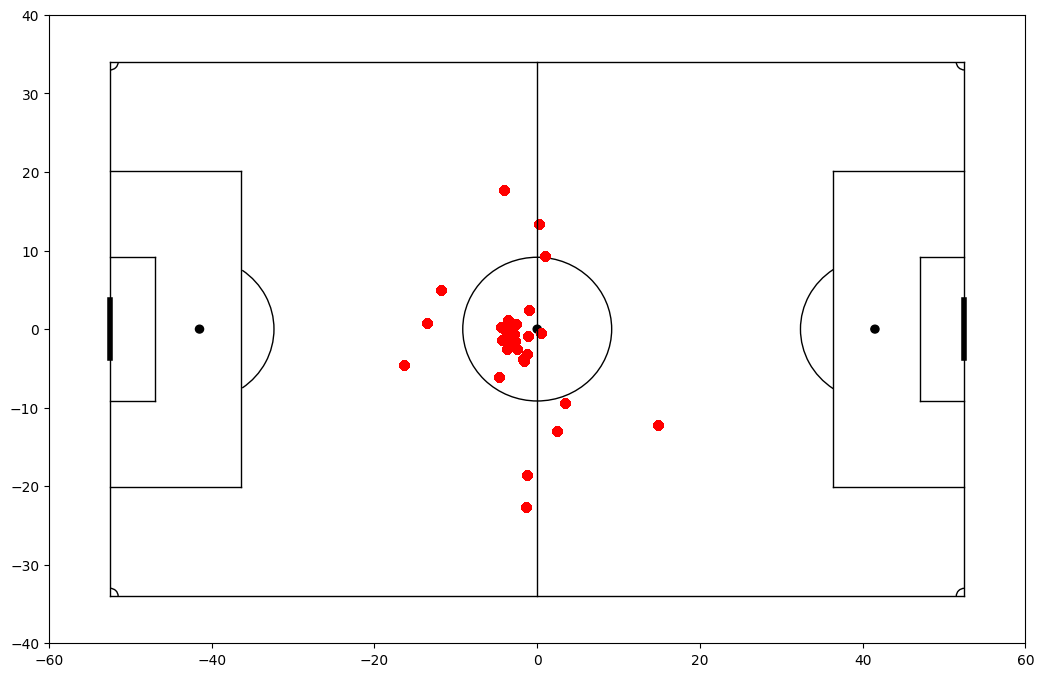

In [8]:
# Crear el gráfico y dibujar el campo
plt.figure(figsize=(12*1.05, 12*0.68), frameon=False)
draw_pitch(plt.gca())

# Agregar las posiciones de los jugadores al gráfico
plt.scatter(df_pos['mean_pos_x'], df_pos['mean_pos_y'], color='red', label='Posiciones de jugadores')

# Ajustar límites del gráfico si es necesario
plt.xlim(-60, 60)
plt.ylim(-40, 40)

# Mostrar el gráfico
plt.show()

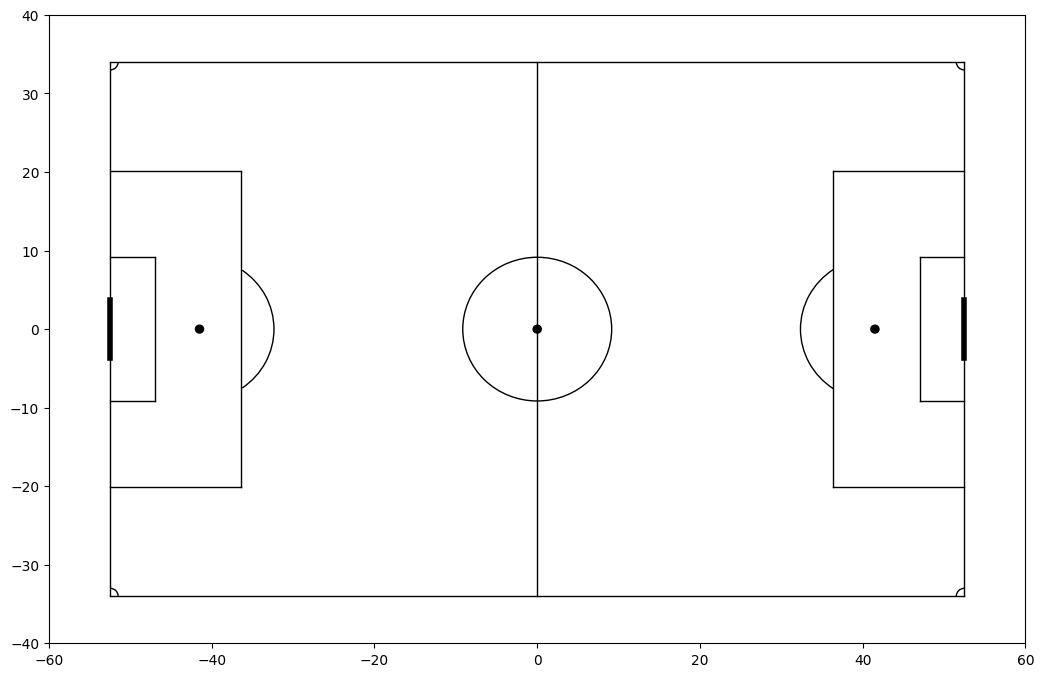

In [12]:
plt.figure(figsize=(12*1.05,12*0.68),frameon=False)
draw_pitch(plt.gca())

plt.xlim(-60, 60)
plt.ylim(-40, 40)
plt.show()

In [ ]:
_